# Prime Count

The value of prime sum could be an interesting concept. I studied this subject before and I want to visit again.

I changed the experiment, this is now prime counting and I will work on prime counts


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

In [3]:
class NumberSum:

    def __init__(self,n):
        self.normal_nums = []
        self.prime_nums = []
        self.all_nums = []
        self.n = n

    def is_prime(self,n):
        for i in range(2,int(n//2)+1):
            if n % i == 0:
                return False
        return True
    

    
    def define_primes(self,n):
        self.n = n
        if len(self.prime_nums) > 0:
            x = self.prime_nums[-1]
        else:
            x = 0
        for i in range(1+x,n):
            if i == 1:
                continue
            if self.is_prime(i):
                self.prime_nums.append(i)
            else:
                self.normal_nums.append(i)
        self.all_nums = [i for i in range(n)]

    def print_primes(self):
        print(f"prime numbers are {self.prime_nums}")

    def sum_of_primes(self):
        return sum(self.prime_nums)
    
    def plot_values(self):
        sns.lineplot(data=self.prime_nums)
        sns.lineplot(data=self.normal_nums)
        sns.lineplot(data=self.all_nums)

    def total_sum(self):
        return sum(self.all_nums)
    
    def ratio_of_primes(self):
        return self.sum_of_primes() / self.total_sum()

    def ratio_plot_start(self,limit):
        ratio_all = []
        arr_all = []
        arr_primes =[]
        for i in range(2,limit):
            if self.is_prime(i):
                arr_primes.append(i)
            arr_all.append(i)
            ratio_all.append(sum(arr_primes) / sum(arr_all))

        sns.lineplot(data=ratio_all)

        

        

prime numbers are [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


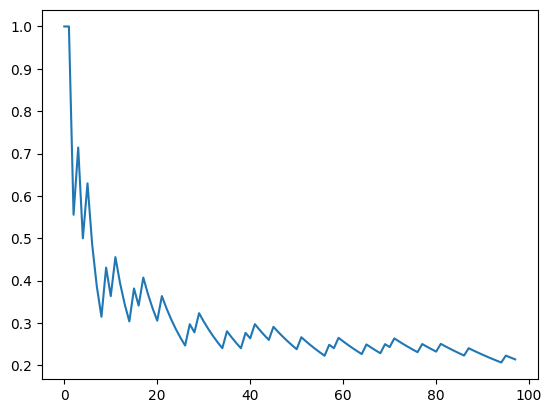

In [4]:
numSum = NumberSum(100)
numSum.define_primes(100)
numSum.print_primes()
numSum.sum_of_primes()
numSum.ratio_plot_start(100)

## Hypothesis

The number prime ensures that for every next of its multiplication it ensures this number is not prime.. Therefore roughly we can say that
1/2, 1/3 and sum shows the normal values. and 1-(S) this shows the prime values

In [5]:
class PrimeSime(NumberSum):

    def __init__(self, n):
        super().__init__(n)

    def prime_sum_formula(self):
        x = 0
        iter = 0
        while iter < self.n:
            if x > 2:
                a = random.choice(list(range(2,x,2)))
            else:
                a = random.choice(list(range(2,self.n,2)))
            iter += a
            val = a
            for j in range(1,val):
                if a > j:
                    a -= (val / j)
            if a < 0:
                break
            x += a
        
        error_rate = 0.1
        log_n = math.log(self.n)
        return (((self.n - x) / (math.e)**(error_rate)) / log_n) - error_rate
    def prime_count(self):
        return len(self.prime_nums)
 
    
    def plot_arr(self,arr):
        sns.lineplot(arr)
        plt.show()
        

In [6]:
primeSum = PrimeSime(10)
primeSum.define_primes(10)
primeSum.prime_sum_formula()

3.8296589767260305

In [7]:
import math
from functools import lru_cache

# -------------------------
# Sieve for small primes
# -------------------------
MAXN = 10**6
is_prime = [True] * (MAXN + 1)
is_prime[0] = is_prime[1] = False

for i in range(2, int(MAXN**0.5) + 1):
    if is_prime[i]:
        for j in range(i*i, MAXN + 1, i):
            is_prime[j] = False

primes = [i for i in range(2, MAXN + 1) if is_prime[i]]

# -------------------------
# phi(x, a): count numbers <= x not divisible by first a primes
# -------------------------
@lru_cache(None)
def phi(x, a):
    if a == 0:
        return x
    if a == 1:
        return (x + 1) // 2
    return phi(x, a - 1) - phi(x // primes[a - 1], a - 1)

# -------------------------
# Prime counting π(n)
# -------------------------
@lru_cache(None)
def pi(n):
    if n < MAXN:
        # binary search on primes list
        return bisect(n)
    
    a = pi(int(n ** (1/4)))
    b = pi(int(n ** (1/2)))
    c = pi(int(n ** (1/3)))

    result = phi(n, a) + (b + a - 2) * (b - a + 1) // 2

    for i in range(a + 1, b + 1):
        w = n // primes[i - 1]
        result -= pi(w)
        if i <= c:
            lim = pi(int(math.sqrt(w)))
            for j in range(i, lim + 1):
                result -= pi(w // primes[j - 1]) - (j - 1)

    return result

def bisect(x):
    lo, hi = 0, len(primes)
    while lo < hi:
        mid = (lo + hi) // 2
        if primes[mid] <= x:
            lo = mid + 1
        else:
            hi = mid
    return lo


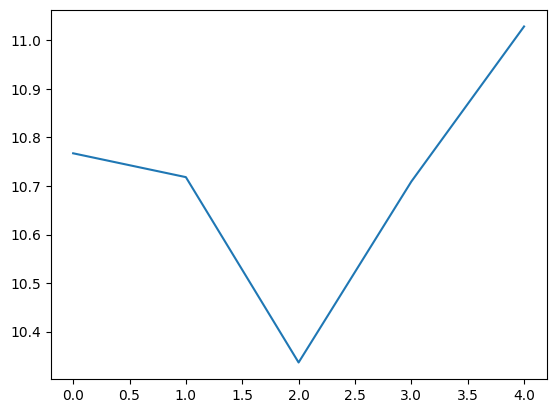

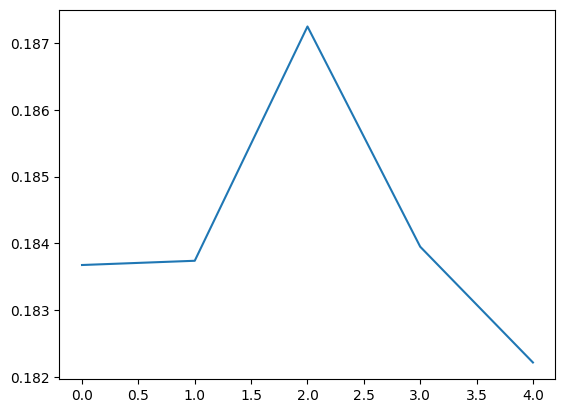

In [8]:

arr = []
error = []
for i in range(5,10):
    r = int(random.uniform(10**4,10**6))
    y = pi(r)
    primeSum = PrimeSime(r)
    y_pred = primeSum.prime_sum_formula()  
    y_pred = math.log(y_pred)
    
    y = math.log(y)
    arr.append(y_pred) 
    error.append(abs(y_pred-y))

primeSum.plot_arr(arr)
primeSum.plot_arr(error)

In [9]:
import time
primeSum = PrimeSime(r)
r = int(random.uniform(10**4,10**6))
start_pi = time.time()
y = pi(r)
finish_pi = time.time()
formula = time.time()
y_pred = primeSum.prime_sum_formula()  
finish_formula = time.time()

print(finish_pi - start_pi)
print(finish_formula - formula)

4.506111145019531e-05
0.05060744285583496


In [10]:
class PrimeSime(NumberSum):

    def __init__(self, n):
        super().__init__(n)

    def prime_sum_formula(self):
        x = 1
        
        error_rate = 0.0005
        beta = 0.0001
        log_n = math.log(self.n)
        val = ((((self.n - x) / (math.e)**(error_rate)) / log_n) - error_rate)

        val = val / (math.e)**(beta)
        val = val + val*error_rate
        val += (val*math.e) / (log_n*2 )
        val -= (val*error_rate*log_n*2.2)
        return val 
    

    def prime_count(self):
        return len(self.prime_nums)
 
    
    def plot_arr(self,arr):
        sns.lineplot(arr)
        plt.show()
        

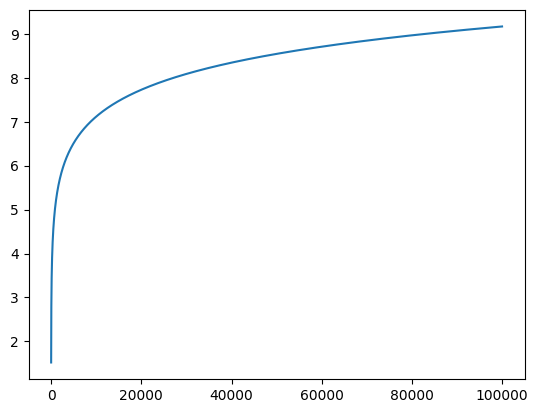

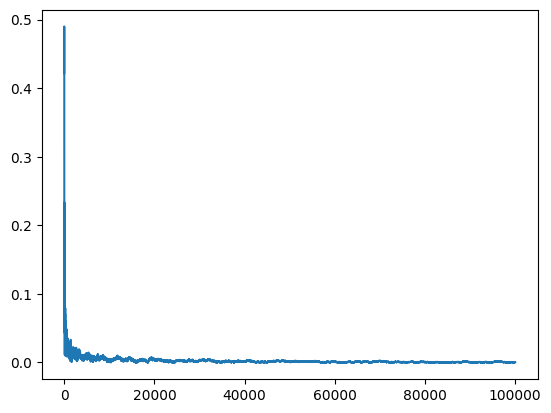

In [11]:

arr = []
error = []
for i in range(5,100000):
    r = i
    y = pi(r)
    primeSum = PrimeSime(r)
    y_pred = primeSum.prime_sum_formula()  
    y_pred = math.log(y_pred)
    y = math.log(y)

    #print(y_pred,y)
    arr.append(y_pred) 
    error.append(abs(y_pred-y))

primeSum.plot_arr(arr)
primeSum.plot_arr(error)


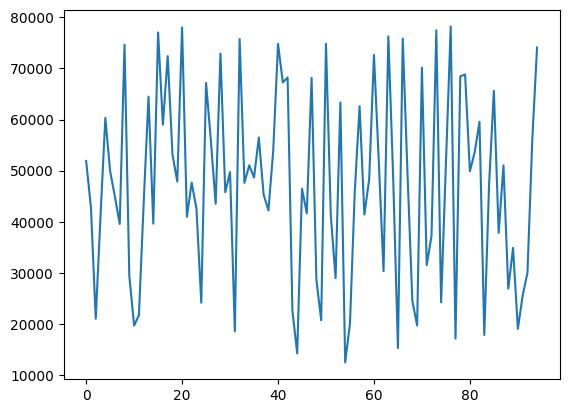

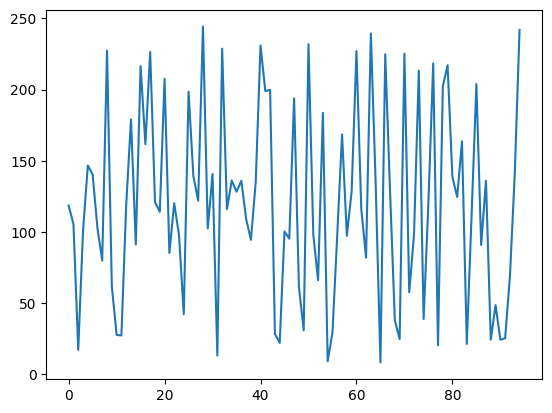

In [12]:

arr = []
error = []
for i in range(5,100):
    r = random.uniform(10**5,10**6)
    y = pi(r)
    primeSum = PrimeSime(r)
    y_pred = primeSum.prime_sum_formula()  

    arr.append(y_pred) 
    error.append(abs(y_pred-y))

primeSum.plot_arr(arr)
primeSum.plot_arr(error)


In [13]:
import sympy
from sympy import primepi
import numpy as np

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_array(arr, title="Array Plot"):
    sns.set_theme(style="darkgrid")
    sns.lineplot(x=range(len(arr)), y=arr)
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()


In [15]:
from math import log
from scipy.special import expi

def li(n):
    return expi(log(n))

def pi_approx_li(n):
    return li(n)

In [16]:
class PrimeSime(NumberSum):

    def __init__(self, n):
        super().__init__(n)

    def prime_sum_formula(self):
        x = 1
        
        error_rate = 0.0005
        beta = 0.0001
        log_n = math.log(self.n)
        val = ((((self.n - x) / (math.e)**(error_rate)) / log_n) - error_rate)

        val = val / (math.e)**(beta)
        val = val + val*error_rate
        val += (val*math.e) / (log_n*2)
        val -= (val*error_rate*log_n*2.055)
        return val 
    

    def prime_count(self):
        return len(self.prime_nums)
 
    
    def plot_arr(self,arr):
        sns.lineplot(arr)
        plt.show()
        

15548.66433779505 15483 15846.95818896303
10054.528792123636 10015 10204.214279854828
14883.782389920982 14838 15162.635244997624
17670.24144874812 17621 18042.790770271255
10291.44493852903 10243 10432.066281019968
11378.783750027867 11327 11552.289846358273
16294.317535181151 16232 16612.38496058899
15914.225041732798 15854 16216.752503497286
11441.599920090364 11394 11642.387135078216
10453.235634870809 10411 10597.43750997287
14637.479076628386 14591 14921.25426202358
14922.37913723808 14873 15220.69124067782
10699.51711740119 10657 10880.156517335688
14024.891374630868 13984 14286.563669379215
12619.683458476526 12568 12826.899406028451
10708.889335962507 10662 10872.195609081218
10950.922761920654 10897 11113.266418645384
14694.416151753665 14647 14963.928240504136
16719.474265612345 16662 17049.855875300873
13842.617364691576 13797 14089.636834482662
17938.371915863703 17885 18373.42162566934
16545.66682961775 16480 16871.57765964131
16239.48956625341 16173 16554.30268324493
176

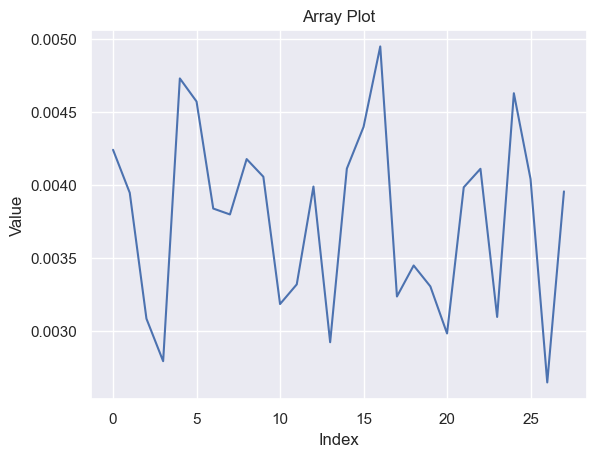

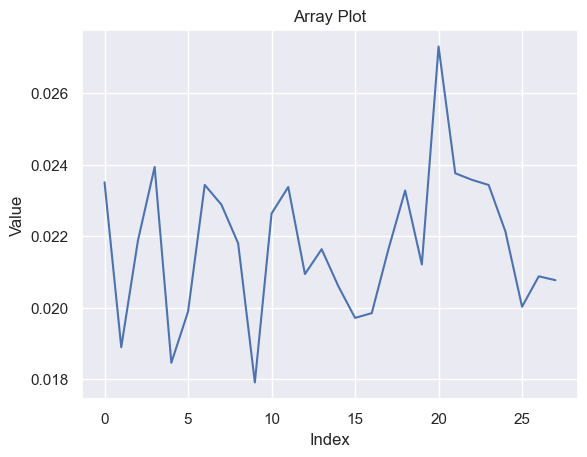

In [67]:

error_ratio = []
error_ratio_real = []
exp=5
for i in range(2,30):
    r = int(random.uniform(10**exp,10**exp*2))
    primeSum = PrimeSime(r)
    y_real = pi(r)
    y = pi_approx_li(r)
    y_pred = primeSum.prime_sum_formula()  
    error = abs(y_real - y) / y_real
    error = round(error,10)

    error2 = abs(y_pred - y_real) / y_real
    error2 = round(error2,10)
    
    error_ratio.append(error)
    error_ratio_real.append(error2)

    print(y,y_real,y_pred)


arr = np.asarray(error_ratio, dtype=float)
arr2 = np.asarray(error_ratio_real, dtype=float)
plot_array(arr)
plot_array(arr2)

In [68]:
class PrimeSime(NumberSum):

    def __init__(self, n):
        super().__init__(n)

    def prime_sum_formula(self):
        x = self.n
        
        val = 0
        for i in range(2,self.n):
            if sympy.isprime(i):
                x -= x / i
                val = i

        return ((abs(x) + (self.n-val))*2)
    

    def prime_count(self):
        return len(self.prime_nums)
 
    
    def plot_arr(self,arr):
        sns.lineplot(arr)
        plt.show()
        

In [62]:
primeSum = PrimeSime(30)
primeSum.prime_sum_formula()

11.476833386117136

15966.91751697071 15906 16271.0764834289
13274.138716364161 13237 13532.185139557983
13661.129114729358 13611 13909.322247495129
18020.649359098443 17970 18381.974811141867
13915.03334971424 13873 14181.681430870192
9695.366028396606 9654 9834.134775946684
14189.69695238083 14156 14445.396567980719
17648.16118765849 17597 18018.120800302582


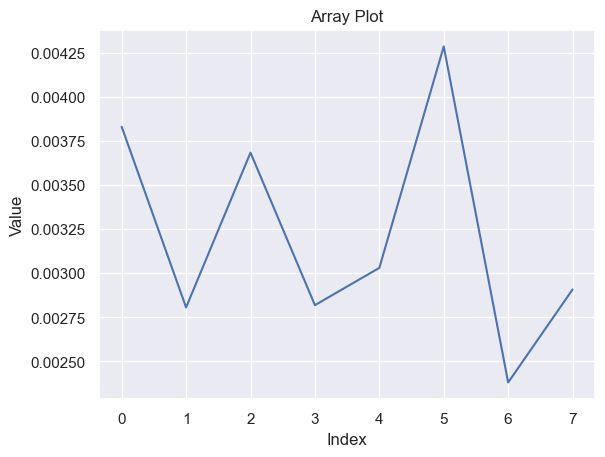

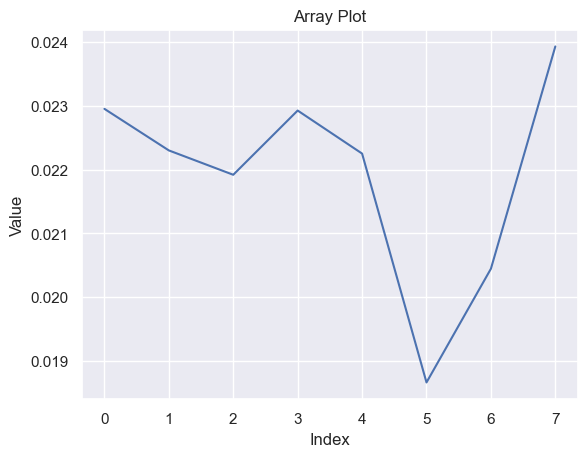

In [64]:
error_ratio = []
error_ratio_real = []
exp=5
for i in range(2,10):
    r = int(random.uniform(10**exp,10**exp*2))
    primeSum = PrimeSime(r)
    y_real = pi(r)
    y = pi_approx_li(r)
    y_pred = primeSum.prime_sum_formula()  
    error = abs(y_real - y) / y_real
    error = round(error,10)

    error2 = abs(y_pred - y_real) / y_real
    error2 = round(error2,10)
    
    error_ratio.append(error)
    error_ratio_real.append(error2)

    print(y,y_real,y_pred)


arr = np.asarray(error_ratio, dtype=float)
arr2 = np.asarray(error_ratio_real, dtype=float)
plot_array(arr)
plot_array(arr2)